<B>CodeClause

**Project Name- Basic Project.<br>
Task2-Market Basket Analysis in Python using Apriori.**

Importing required libaries.

In [ ]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Importing Dataset

In [ ]:
df = pd.read_csv("Assignment-1_Data.csv",parse_dates=['InvoiceDate'])
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62641 entries, 0 to 62640
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    62641 non-null  object        
 1   StockCode    62641 non-null  object        
 2   Description  62477 non-null  object        
 3   Quantity     62640 non-null  float64       
 4   InvoiceDate  62640 non-null  datetime64[ns]
 5   UnitPrice    62640 non-null  float64       
 6   CustomerID   38513 non-null  float64       
 7   Country      62640 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.8+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(62641, 8)

In [ ]:
df.describe().round(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,62640.00,62640.00,38513.00
mean,8.34,5.92,15386.75
std,423.03,148.90,1765.51
min,-74215.00,0.00,12346.00
25%,1.00,1.25,13983.00
50%,2.00,2.51,15358.00
75%,8.00,4.25,17017.00
max,74215.00,16888.02,18283.00


Data Cleaning

In [ ]:
#Ensure that the data type in the InvoiceNo column is in the form of a string.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.sort_values('InvoiceNo', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
62480,C541503,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-1.0,2011-01-18 15:31:00,6.75,15291.0,United Kingdom
62479,C541502,22768,FAMILY PHOTO FRAME CORNICE,-1.0,2011-01-18 15:30:00,9.95,18190.0,United Kingdom
62478,C541501,85118,HEART T-LIGHT HOLDER,-7.0,2011-01-18 15:26:00,1.25,13458.0,United Kingdom
62462,C541499,22766,PHOTO FRAME CORNICE,-1.0,2011-01-18 15:23:00,2.95,13693.0,United Kingdom
62463,C541499,22325,MOBILE VINTAGE HEARTS,-3.0,2011-01-18 15:23:00,4.95,13693.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-01-12 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,4.25,17850.0,United Kingdom


In [ ]:
#Delete canceled transaction rows
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(61586, 8)

In [ ]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variable,number_of_missing,percentage_of_missing
0,CustomerID,24075,39.091677
1,Description,164,0.266294
2,Quantity,1,0.001624
3,InvoiceDate,1,0.001624
4,UnitPrice,1,0.001624
5,Country,1,0.001624
6,InvoiceNo,0,0.000000
7,StockCode,0,0.000000


We have missing values in the CustomerID and Description columns. Because the data is large, dropping the missing values will not cause a problem in data size. Additionally, CustomerlD and Description can not be filled because it will affect the analysis later.

In [ ]:
df = df.dropna(subset = ['CustomerID', 'Description'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
missingvalue(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


In [ ]:
#Remove spaces at the beginning or end of sentences
df['Description'] = df['Description'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(37511, 8)

In [ ]:
df.info()
df['CustomerID'] = df['CustomerID'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37511 entries, 0 to 62639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    37511 non-null  object        
 1   StockCode    37511 non-null  object        
 2   Description  37511 non-null  object        
 3   Quantity     37511 non-null  float64       
 4   InvoiceDate  37511 non-null  datetime64[ns]
 5   UnitPrice    37511 non-null  float64       
 6   CustomerID   37511 non-null  float64       
 7   Country      37511 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,UnitPrice,CustomerID
count,37511.000000,37511.000000,37511.000000
mean,14.626163,3.142088,15396.816587
std,386.268828,5.327957,1767.810690
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14016.000000
50%,5.000000,1.950000,15379.000000
75%,12.000000,3.750000,17019.000000
max,74215.000000,295.000000,18283.000000


**<h2>Exploratory Data Analysis**

What products do customers buy the most?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


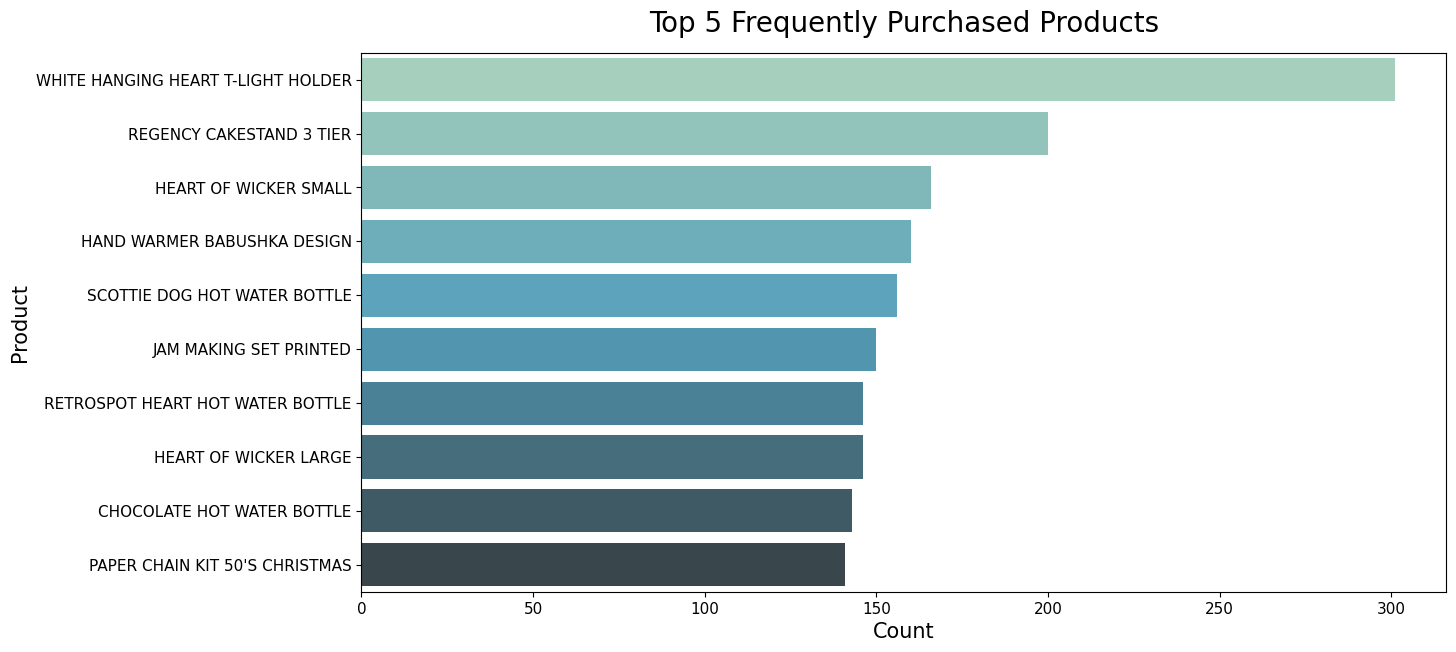

In [ ]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['Description'],
                   order = df["Description"].value_counts().iloc[:10].index,
                   palette = "GnBu_d")
ax.set_title("Top 5 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

How many orders (per month)?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


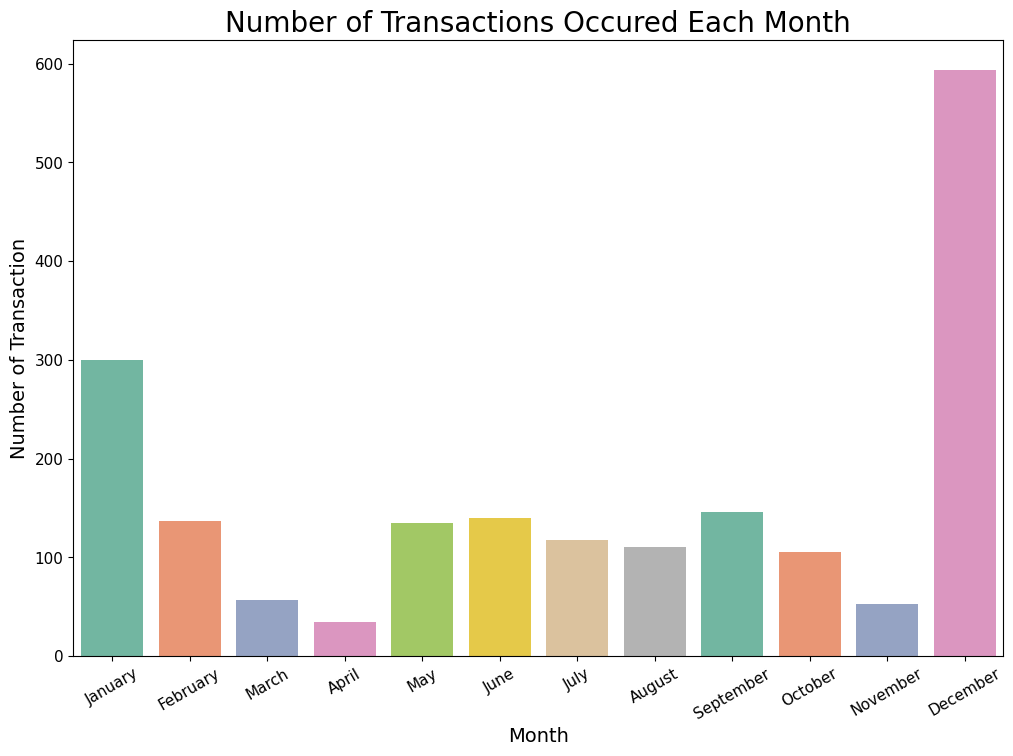

In [ ]:
order_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_month.reset_index(), palette = "Set2")
ax.set_title('Number of Transactions Occured Each Month', size = 20)
ax.set_xlabel('Month', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 30)
plt.show()


How many orders (per day)?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: ignored

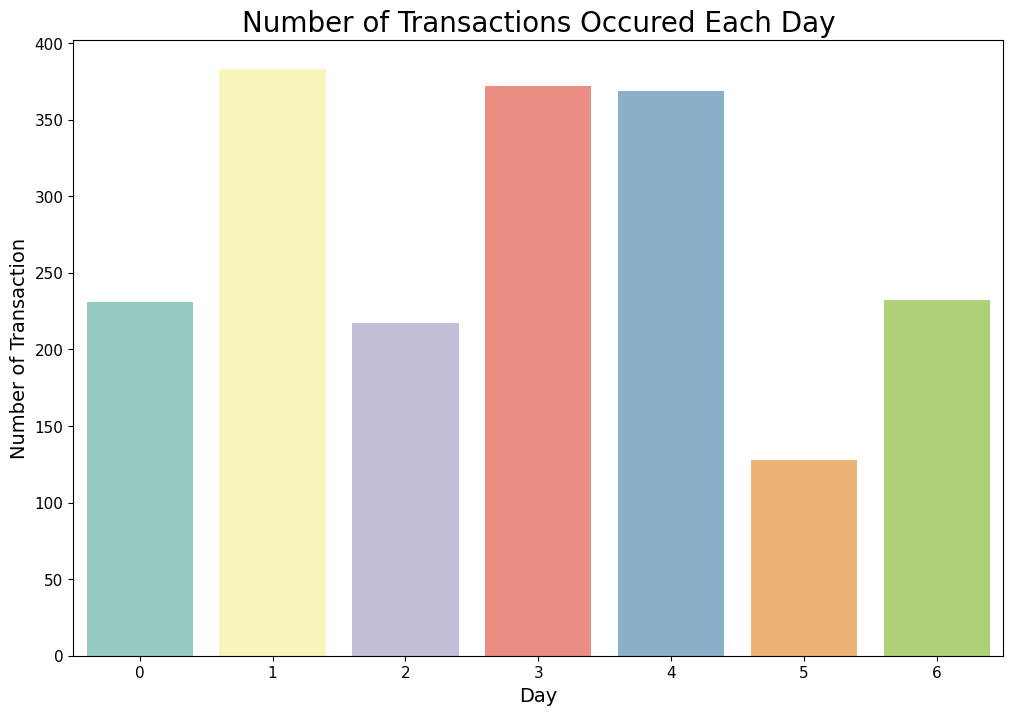

In [ ]:
order_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(), palette = "Set3")
ax.set_title('Number of Transactions Occured Each Day', size = 20)
ax.set_xlabel('Day', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

How many orders (per hour)?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


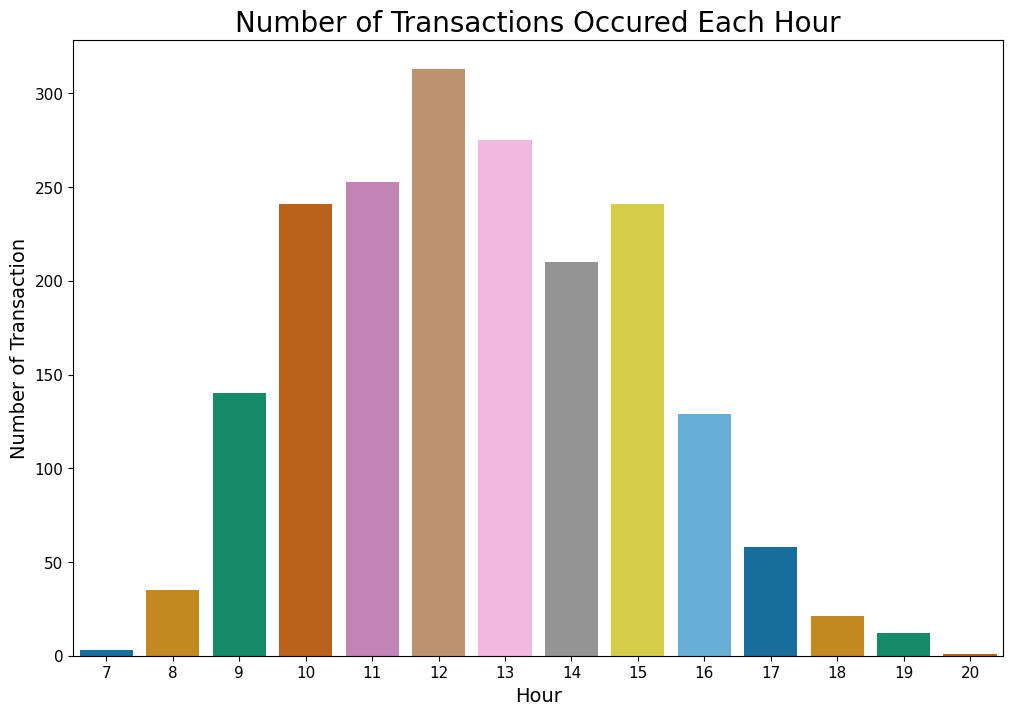

In [ ]:
order_hour = df.groupby(df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_hour.reset_index(), palette = "colorblind")
ax.set_title('Number of Transactions Occured Each Hour', size = 20)
ax.set_xlabel('Hour', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()


Who are the 5 customers who spend the most money on Online Retail?

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
price_cust = pd.pivot_table(df, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('The following are 5 customers who spend the most money on Online Retail:')
price_cust.sort_values('TotalPrice', ascending=False)[:5]

The following are 5 customers who spend the most money on Online Retail:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,TotalPrice
CustomerID,
12346,77183.60
18102,27834.61
15749,22998.40
15061,22107.61
17450,20649.04


Who are the five most frequent customer shopping in Online Retail?

In [ ]:
order_cust = pd.pivot_table(df, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('The following are the 5 customers who most frequently shop at Online Retail:')
order_cust.sort_values('InvoiceNo', ascending=False)[:5]

The following are the 5 customers who most frequently shop at Online Retail:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo
CustomerID,
12748,39
17850,34
15061,16
15311,15
14911,15


Time Cohorts

In [ ]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01


In [ ]:
group = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group.transform('min')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,2010-01-01,2010-01-01
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,2010-01-01,2010-01-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...
62635,541509,21868,POTTING SHED TEA MUG,6.0,2011-01-18 16:31:00,1.25,13263,United Kingdom,7.50,2011-01-01,2011-01-01
62636,541509,72741,GRAND CHOCOLATECANDLE,3.0,2011-01-18 16:31:00,1.45,13263,United Kingdom,4.35,2011-01-01,2011-01-01
62637,541509,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.0,2011-01-18 16:31:00,2.95,13263,United Kingdom,2.95,2011-01-01,2011-01-01
62638,541509,22804,CANDLEHOLDER PINK HANGING HEART,1.0,2011-01-18 16:31:00,2.95,13263,United Kingdom,2.95,2011-01-01,2011-01-01


In [ ]:
def date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
invoice_year, invoice_month, _ = date(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = date(df, 'CohortMonth')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
diff_year = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['IndexTime'] = diff_year*12 + diff_month + 1
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,2010-01-01,2010-01-01,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,2010-01-01,2010-01-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62635,541509,21868,POTTING SHED TEA MUG,6.0,2011-01-18 16:31:00,1.25,13263,United Kingdom,7.50,2011-01-01,2011-01-01,1
62636,541509,72741,GRAND CHOCOLATECANDLE,3.0,2011-01-18 16:31:00,1.45,13263,United Kingdom,4.35,2011-01-01,2011-01-01,1
62637,541509,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.0,2011-01-18 16:31:00,2.95,13263,United Kingdom,2.95,2011-01-01,2011-01-01,1
62638,541509,22804,CANDLEHOLDER PINK HANGING HEART,1.0,2011-01-18 16:31:00,2.95,13263,United Kingdom,2.95,2011-01-01,2011-01-01,1


In [ ]:
count_cohort_time = df.groupby(['CohortMonth', 'IndexTime'])['CustomerID'].apply(pd.Series.nunique)
count_cohort_time = count_cohort_time.reset_index()
cohort_time_table = count_cohort_time.pivot(index='CohortMonth', columns='IndexTime', values='CustomerID')
cohort_time_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexTime,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2010-01-01,95.0,6.0,4.0,NaN,5.0,7.0,3.0,10.0,7.0,5.0,...,NaN,3.0,7.0,4.0,5.0,NaN,4.0,3.0,1.0,5.0
2010-02-01,93.0,NaN,NaN,NaN,2.0,6.0,3.0,7.0,4.0,NaN,...,1.0,3.0,4.0,3.0,NaN,4.0,3.0,6.0,2.0,NaN
2010-03-01,46.0,NaN,1.0,1.0,1.0,NaN,3.0,NaN,NaN,12.0,...,2.0,4.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
2010-05-01,69.0,2.0,3.0,1.0,4.0,1.0,NaN,25.0,11.0,NaN,...,1.0,NaN,7.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN
2010-06-01,70.0,2.0,2.0,1.0,1.0,NaN,21.0,9.0,NaN,NaN,...,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,50.0,NaN,1.0,1.0,NaN,6.0,5.0,NaN,NaN,1.0,...,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,83.0,NaN,1.0,NaN,20.0,5.0,NaN,NaN,1.0,4.0,...,1.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,67.0,NaN,NaN,15.0,7.0,NaN,NaN,2.0,1.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,40.0,NaN,9.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<B><h4>Customer Retention Rate<br>
Customer retention is a very useful metric to understand how many of all the customers are still active. Customer retention rate designates the percentage of customers the company has retained over a given time period. Retention rate is a reverse side of churn rate, which shows the percentage of customers a company has lost over a specific period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


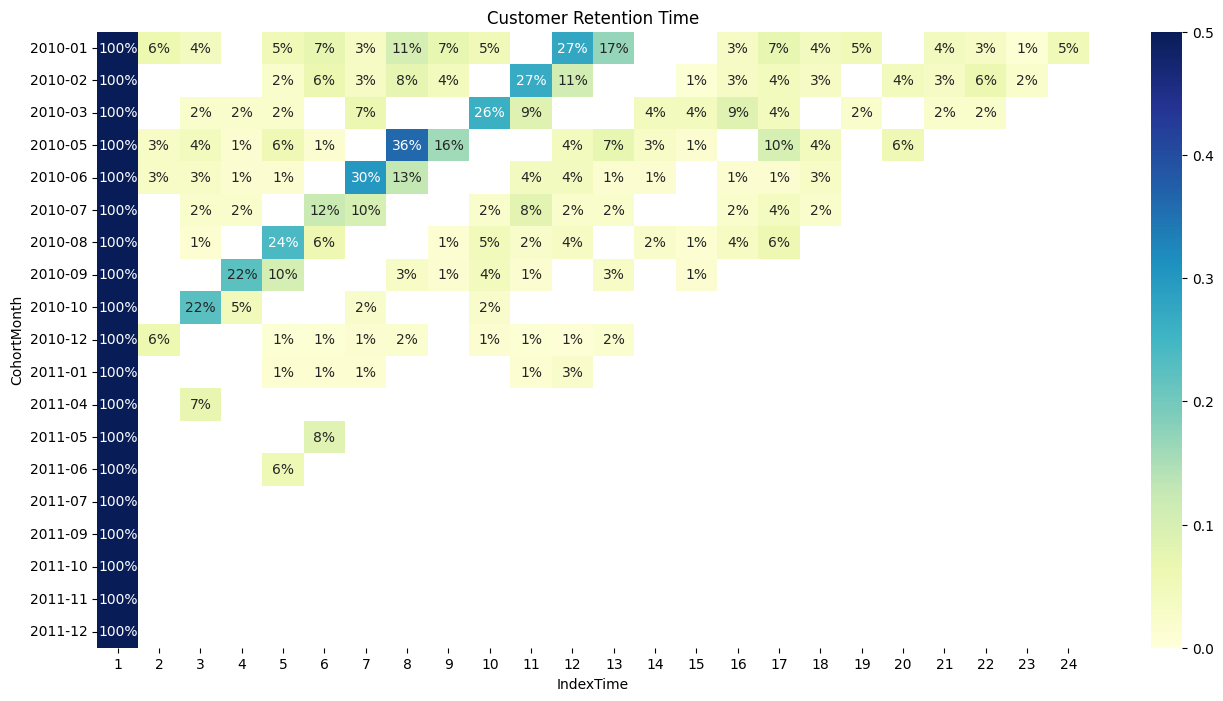

In [ ]:
cohort_size = cohort_time_table.iloc[:,0]
#Divide all values in the cohort_time_table by cohort_size
retention = cohort_time_table.divide(cohort_size, axis = 0)
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize= (16,8))
ax = sns.heatmap(data = retention, annot = True, annot_kws={"size":10}, vmin = 0.0, vmax = 0.5, fmt = '.0%', cmap = 'YlGnBu')
plt.title('Customer Retention Time')
plt.show()

In [ ]:
print('Min: {}\nMax: {}'.format(min(df['InvoiceDate']), max(df['InvoiceDate'])))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Min: 2010-01-12 08:26:00
Max: 2011-12-01 16:57:00


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,2010-01-01,2010-01-01,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,2010-01-01,2010-01-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,2010-01-01,2010-01-01,1


In [ ]:
analysis_date = max(df['InvoiceDate']) + dt.timedelta(days= 1)
print((analysis_date).date())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2011-12-02


In [ ]:
rfm_cust = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
rfm_cust.rename(columns= {'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'}, inplace = True)
rfm_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary
CustomerID,,,
12346,318,1,77183.60
12347,508,31,711.79
12348,350,17,892.80
12356,318,36,2271.62
12359,1,16,547.50
...,...,...,...
18245,348,27,365.73
18259,477,7,376.30
18260,92,37,787.77


RFM **quartile**

In [ ]:
#1 is the best and 4 is the worst
r_labels = range(1,5) #The longer the customer last purchase, the worse it is
f_labels = range(4,0,-1) #The more purchases the customer makes, the better it is
m_labels = range(4,0,-1) #The more money the customer spends, the better it is

r_quartiles = pd.qcut(rfm_cust['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_cust['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm_cust['Monetary'], q=4, labels=m_labels)

rfm_cust = rfm_cust.assign(R = r_quartiles.values, F = f_quartiles.values, M = m_quartiles.values)

rfm_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,318,1,77183.60,2,4,1
12347,508,31,711.79,4,2,1
12348,350,17,892.80,2,3,1
12356,318,36,2271.62,2,2,1
12359,1,16,547.50,1,3,2
...,...,...,...,...,...,...
18245,348,27,365.73,2,2,2
18259,477,7,376.30,4,4,2
18260,92,37,787.77,1,2,1


In [ ]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm_cust['RFM_Segment'] = rfm_cust.apply(join_rfm, axis=1)
rfm_cust['RFM_Score'] = rfm_cust[['R', 'F', 'M']].sum(axis=1)
rfm_cust.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,318,1,77183.60,2,4,1,2.04.01.0,7
12347,508,31,711.79,4,2,1,4.02.01.0,7
12348,350,17,892.80,2,3,1,2.03.01.0,6
12356,318,36,2271.62,2,2,1,2.02.01.0,5
12359,1,16,547.50,1,3,2,1.03.02.0,6


In [ ]:
rfm_cust.groupby('RFM_Segment').size().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RFM_Segment
1.01.01.0    82
4.04.04.0    58
3.04.04.0    46
3.03.03.0    40
2.01.01.0    38
             ..
1.01.03.0     3
4.03.01.0     3
3.04.01.0     3
1.01.04.0     3
2.01.04.0     1
Length: 64, dtype: int64

In [ ]:
rfm_cust.groupby('RFM_Score').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           116.2     118.7   2900.2    82
4           217.0      62.0   1755.6    82
5           256.3      44.3   1063.1   112
6           284.8      39.4    998.1   125
7           331.5      30.6   1199.9   147
8           384.3      24.4    371.1   143
9           364.6      15.5    274.3   155
10          463.0      12.5    220.1   114
11          490.4       7.3    174.5    94
12          594.0       5.2    119.8    58

In [ ]:
loyalty_level =['Platinum','Gold','Silver','Bronze']
loyalty_quartile = pd.qcut(rfm_cust['RFM_Score'], q=4, labels=loyalty_level)
rfm_cust['Loyalty_Level'] = loyalty_quartile.values
rfm_cust

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Loyalty_Level
CustomerID,,,,,,,,,
12346,318,1,77183.60,2,4,1,2.04.01.0,7,Gold
12347,508,31,711.79,4,2,1,4.02.01.0,7,Gold
12348,350,17,892.80,2,3,1,2.03.01.0,6,Platinum
12356,318,36,2271.62,2,2,1,2.02.01.0,5,Platinum
12359,1,16,547.50,1,3,2,1.03.02.0,6,Platinum
...,...,...,...,...,...,...,...,...,...
18245,348,27,365.73,2,2,2,2.02.02.0,6,Platinum
18259,477,7,376.30,4,4,2,4.04.02.0,10,Bronze
18260,92,37,787.77,1,2,1,1.02.01.0,4,Platinum


In [ ]:
rfm_cust.groupby('Loyalty_Level').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recency Frequency Monetary      
                 mean      mean     mean count
Loyalty_Level                                 
Platinum        228.5      61.6   1560.1   401
Gold            357.5      27.6    791.2   290
Silver          364.6      15.5    274.3   155
Bronze          501.3       9.1    182.1   266

<b>Key k-means assumptions<br>
1.Symmetric distribution of variables (not skewed)<br>
2.Variables with same average values<br>
3.Variables with same variance<br>

In [ ]:
def rfm_dist(column):
    r_skew = rfm_cust[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})
    plt.title('{} Distribution'.format(column))

    plt.show()
    print('Skewness value of data {}: {}'.format(column, r_skew))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


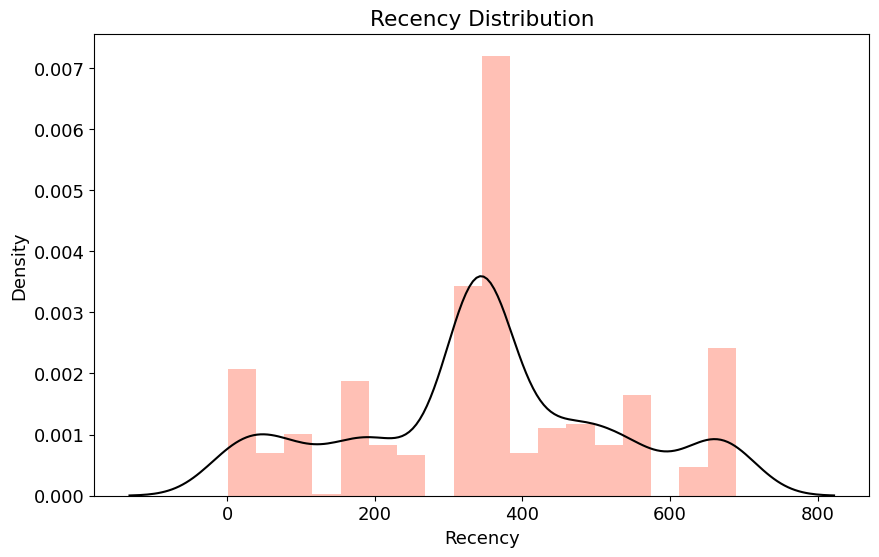

Skewness value of data Recency: -0.029897473662249905


In [ ]:
rfm_dist('Recency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


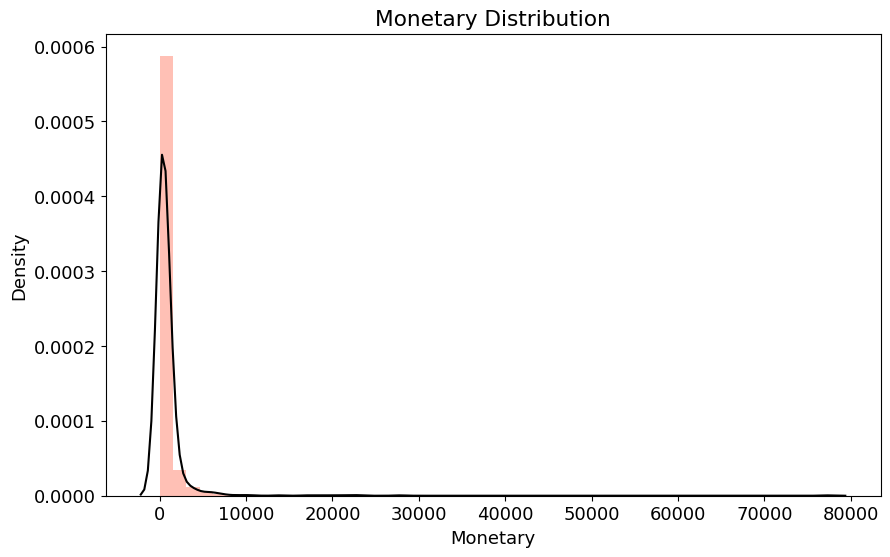

Skewness value of data Monetary: 17.578480888657932


In [ ]:
rfm_dist('Monetary')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-19f3816347d9>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})


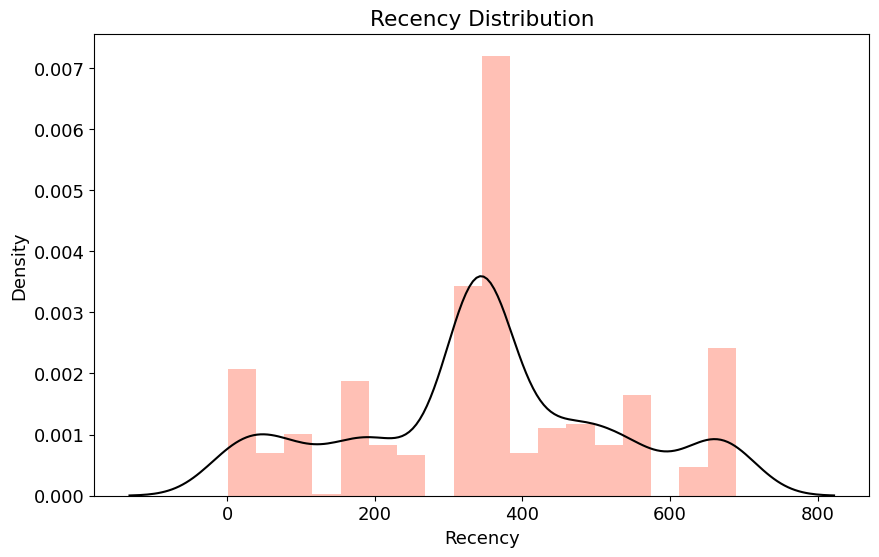

Skewness value of data Recency: -0.029897473662249905


In [ ]:
rfm_dist('Recency')

In [ ]:
print("The following is the skewness value for Recency, Frequency, and Monetary data:",
      '\nRecency   : {}'.format(rfm_cust['Recency'].skew()),
      '\nFrequency : {}'.format(rfm_cust['Frequency'].skew()),
      '\nMonetary  : {}'.format(rfm_cust['Monetary'].skew()))

The following is the skewness value for Recency, Frequency, and Monetary data: 
Recency   : -0.029897473662249905 
Frequency : 5.762621976510808 
Monetary  : 17.578480888657932


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The following is the skewness value for Recency, Frequency, and Monetary data:<br>
Recency   : 1.9175159984488952<br>
Frequency : 18.106242903118684<br>
Monetary  : 19.326985305561823<br>
As a general rule of thumb:<br>
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.<br>
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.<br>
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.<br>

From the general rule of thumb, it can be concluded that data Recency, Frequency, and Monetary are highly positive skew. So, the data must be transformed (Data Transformation) to make it into a normal distribution.<br>

In [ ]:
rfm_norm = rfm_cust[['Recency','Frequency','Monetary']]
rfm_norm.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary
count,1112.000000,1112.000000,1112.000000
mean,346.372302,33.732914,850.751007
std,180.545109,44.873175,2967.730453
min,1.000000,1.000000,0.850000
25%,245.000000,10.000000,208.602500
50%,350.000000,20.000000,350.680000
75%,453.750000,42.000000,702.890000
max,689.000000,693.000000,77183.600000


In [ ]:
power = PowerTransformer().fit(rfm_norm)
rfm_transform =power.transform(rfm_norm)

#Standard Scaler to Scale the data
scaler = StandardScaler().fit(rfm_transform)
rfm_transform = scaler.transform(rfm_transform)

rfm_transform =pd.DataFrame(rfm_transform, index=rfm_norm.index, columns=rfm_norm.columns)
print('These are the mean value after data transformation:')
rfm_transform.describe()

These are the mean value after data transformation:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Recency,Frequency,Monetary
count,1.112000e+03,1.112000e+03,1112.000000
mean,-6.389773e-18,3.035142e-17,0.000000
std,1.000450e+00,1.000450e+00,1.000450
min,-2.172000e+00,-2.195781e+00,-6.996371
25%,-4.904746e-01,-6.499573e-01,-0.599133
50%,8.092893e-02,-2.786557e-02,-0.068967
75%,6.135141e-01,6.858028e-01,0.599288
max,1.744245e+00,3.713789e+00,4.065945


In [ ]:
def rfm_dist_transform(column):
    r_skew_transform = rfm_transform[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})
    plt.title('{} Distribution after Data Transformation'.format(column))

    plt.show()
    print('Skewness value of data {} after data transformation: {}'.format(column, r_skew_transform))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Since the skewness values are between -0.5 to 0.5, or close to 0, it can be assumed that the RFM data has a normal distribution.<br>

We will choose 4 clusters based on the elbow method, because there is no significant decrease in sum of squared distance or SSE after 4 clusters. Based on the silhouette analysis, the silhouette_score that is close to 1 is for the number of clusters 2 and 4.By combining the elbow method and silhouette analysis, the number of clusters 4 is selected.<br>

<b><h5>Conclusion Market Basket Analysis</h5>

From the market basket analysis, it is found that customers who buy PINK REGENCY TEACUP AND SAUCER tend to buy GREEN REGENCY TEACUP AND SAUCER. The three most frequent associations for lift over 6 and confidence above 8 are items related to teacup and saucer. Perhaps we can provide more color variants on the teacup.